In [1]:
a = 'b'
c = 'b'
if a == c and a == 'a':
    print('yes')
elif c == 'b' and a == 'b':
    print('hmm')
else:
    print('no')

hmm


# Commence importing of Module

In [2]:
import os
import hashlib

## Creation of Salt

In [7]:
salt = os_urandom(32)

NameError: name 'os_urandom' is not defined

## Creating Key, hashing (hmac) and byte conversion

#### Hash protocol = pbkdf2_hmac; built on sha256

In [ ]:
key = hashlib.pbkdf2_hmac('sha256', 'password'.encode('utf-8'), salt, 100000)
#     _hashing code_             <converting password to byte>        

#### Store Salt and Key

In [ ]:
Storage = salt + key

## Detour:

#### The 7 columns in the dataset are described below:

id:- Unique identifier from Hacker News for the post

title:- Title of the post

url:- The URL that the posts links to, if the post has a URL

num_points:- Number of points the post acquired (calculated as total upvotes - total downvotes)

num_comments:- Number of comments on the post

author:- Username of the person who submitted the post

created_at:- Date and time of the post's submission


#### Categories of Interest

We're specifically interested in posts with titles that begin with either Ask HN or Show HN.

#### Importing Libraries
As we progress in this project, 

we will need to read files; work with date and time; and create visualizations. 

To make these processes possible, 

we will import python's _reader_ and _datetime_ modules, 

including plotly's visualisation libraries - plotly.express, 

plotly.graph_objects and plotly.subplots:

In [3]:
from csv import reader
import datetime as dt


In [4]:
show_date_and_time = dt.open

AttributeError: module 'datetime' has no attribute 'open'

# March, 30th 2022
# Training a neural network module to Classify images of clothing
### TensorFlow program
#### A high-level API to build and train models in TensorFlow.

# MODEL 1

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf     #As an Alias

# Helper libraries
import numpy as np           #⇈
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

2.6.3


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot




_Each image is mapped to a single label._

_Since the class names are not included with the dataset,_

_store them here to use later when plotting the images:_

In [9]:
class_names = ['Nice Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the <u>format of the dataset</u> before training the model. The following shows there are 60,000 images in the training set, with each image represented as <b>28 x 28 pixels:</b>

In [10]:
train_images.shape     # The shape is a List/Array that represents the dimentionality of the Dataframe or Dataset! 

(60000, 28, 28)

Likewise, there are 60,000 labels in the <b>training set;</b>  _60,000 images and labels_

In [11]:
train_labels.shape    # No shape

(60000,)

In [12]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [13]:
train_labels    #array: list of the labels in the dataset;
                # dtype = datatype; Interpretation of fixed block memory

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are <b>10,000 images</b> in the test set. Again, each image is represented as 28 x 28 pixels:

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
test_labels.shape   # It has a shape (), it's a 0-D Array!

(10000,)

And the test set contains 10,000 images labels:

In [16]:
len(test_labels)

10000

### Pre-process the data

The data must be pre-processed before <b>training</b> the network. 

If you inspect the <u>first image</u> in the training set, you will see that the pixel values fall in the <b>range of 0 to 255:</b>

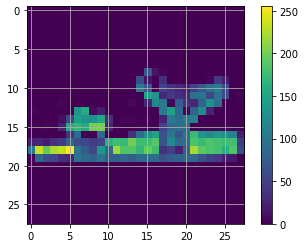

In [22]:
# Using Matplotlib(Matlab);   NB: Python is a general-purpose Language!

plt.figure()
plt.imshow(train_images[59999])   # Image inedx number
plt.colorbar()
plt.grid(True)
plt.show()

Scale these values to a <b>range of 0 to 1</b> before feeding them to the <u>neural network model.</u> 

To do so, divide the values <b>by 255.</b> It's important that the _training set_ and the _testing set_ be preprocessed in the same way:

In [23]:
train_images = train_images / 255.0     # dividing and storing in a variable!

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready <b>to build and train the network</b>, 

let's display the first _25 images_ from the training set and display the class name below each image.

##### NB: Training set contains 60,000 and test set contains 10,000

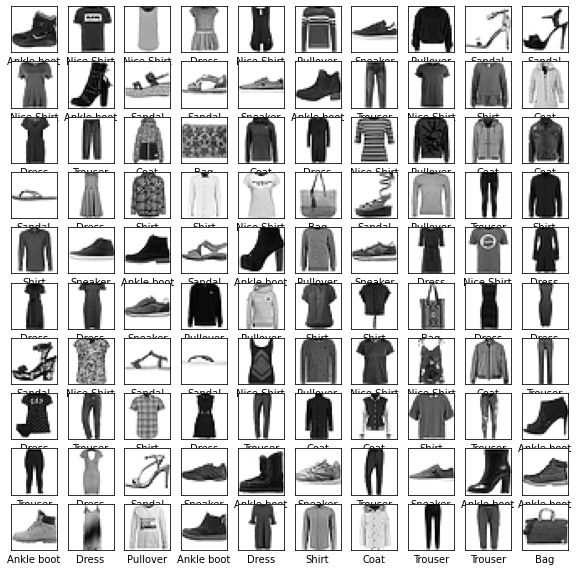

In [24]:
plt.figure(figsize=(10,10))    # Img spacing (horizontal and vertical)
for i in range(100):             # Number of samples
    plt.subplot(10,10,i+1)       # Img frame size
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])     # Items/Class names
plt.show()

# Building the Model using Kera Model and Layers

Building the neural network requires <u>_configuring the layers of the model_</u>, then compiling the model.

###### Set up the layers:
The basic building block of a neural network is the <b>layer.</b> 
Layers <b>extract representations</b> from the data fed into them. Hopefully, these representations are <u>meaningful for the problem at hand.</u>

Most of deep learning consists of <b>chaining together simple layers</b>. Most layers, such as _tf.keras.layers.Dense,_ have parameters that are <b>learned during training.</b>

##### NB: Layers are fed input information, process the info and produces an output, Output from one layer is fed to another as input

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Sequential model; WHen a layer has exactly one input and output tensor! 
# Setting up the Layers

The first layer in this network, <b>tf.keras.layers.Flatten;</b>

Transforms the format of the images from a <b>two-dimensional array</b> (of 28 by 28 pixels) to a <b>one-dimensional array</b> (of 28 * 28 = 784 pixels). 

Think of this layer as <b>unstacking rows of pixels</b> in the image and _lining them up_. This layer has no parameters to learn; it only <b>reformats</b> the data.

After the pixels are flattened, the network consists of a sequence of two <b>tf.keras.layers.Dense layers!</b>

These are densely connected, or fully connected, neural layers. The first Dense layer <b>has 128 nodes(neurons).</b> 

The second (and last) layer returns a <b>logits array with length of 10.</b> Each _node_ contains a score that indicates the current image belongs to one of the <b>10 classes.</b>

## Compile the model

_Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:_

<b>Loss function</b> —This measures how accurate the model is, during training. You want to minimize this function to "steer" the model in the right direction.

<b>Optimizer</b> —This is how the model is updated based on the data it sees and its <b>loss function</b>.

<b>Metrics</b> —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the <b>training data is in the train_images</b> and <b>train_labels</b> arrays.

The model learns to <b>associate</b> _images and labels_.

You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.

# Feeding the model

To start training, call the <b>model.fit</b> method-so called because it <b>"fits"</b> the _model_ to the _training data_:

In [1]:
model.fit(train_images, train_labels, epochs=25)     #feeding the model with the images and labels

NameError: name 'model' is not defined

As the model trains, the <b>loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

<b>Next,</b> compare how the model performs on the <u>test dataset:</u>




In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

It turns out that the accuracy on the test _dataset_ is a <b>little less</b> than the accuracy on the training _dataset_. 

This gap between training accuracy and test accuracy represents <b>overfitting</b>. 

Overfitting happens when a machine learning model performs worse _on new, previously unseen inputs_ than it does on the training data. 

An overfitted model <b>"memorizes"</b> the noise and details in the <u>training dataset</u> to a point where it negatively impacts the performance of the model on the new data.

## Make predictions

With the model trained, you can use it to make predictions about some images. Attach a <b>softmax layer</b> to convert the model's <b>linear outputs—logits—to probabilities</b>, 

Which should be easier to interpret:

In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

### Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [30]:
predictions[0]   

array([4.3400762e-14, 4.5433925e-18, 6.8400504e-13, 1.2776251e-14,
       1.1174274e-10, 5.6831243e-07, 3.3885811e-11, 7.2591042e-06,
       1.4807141e-15, 9.9999213e-01], dtype=float32)

In [31]:
predictions[1]

array([7.5509852e-05, 1.2590827e-21, 9.9983764e-01, 3.0216216e-17,
       6.9084155e-05, 4.6227319e-07, 1.7225015e-05, 2.1592107e-30,
       2.4819298e-15, 7.1076139e-18], dtype=float32)

In [32]:
predictions[0]       # For each image label in the test-set of 10,000

array([4.3400762e-14, 4.5433925e-18, 6.8400504e-13, 1.2776251e-14,
       1.1174274e-10, 5.6831243e-07, 3.3885811e-11, 7.2591042e-06,
       1.4807141e-15, 9.9999213e-01], dtype=float32)

A prediction is an array of <b>10 numbers.</b> They represent the model's "confidence" that the image corresponds to each of the _10 different articles of clothing_. You can see which label has the highest <u>confidence value:</u>

In [33]:
np.argmax(predictions[9000])

6

So, the model is most confident that this image is a Shirt, or class_names[9]. 

Examining the test label shows that this classification is correct:

In [34]:
test_labels[9000]

6

### Graph this to look at the full set of 10 class predictions.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 9000th image, predictions, and prediction array. Correct prediction labels are <b>blue</b> and incorrect prediction labels are <b>red</b>. The number gives the percentage (out of 100) for the predicted label.

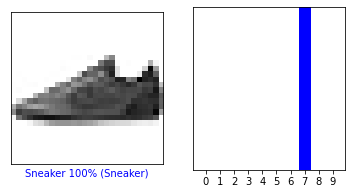

In [104]:
i = 224
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

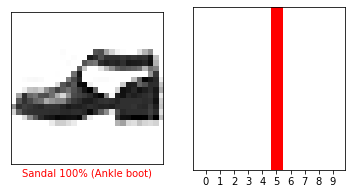

In [37]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()             #The model could still be confident and still incorrect

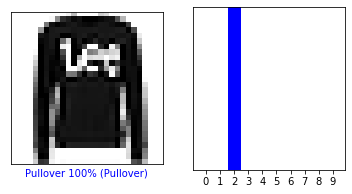

In [90]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()  

#### Plotting several images with their predictions. Note that the model can be wrong even when very confident.

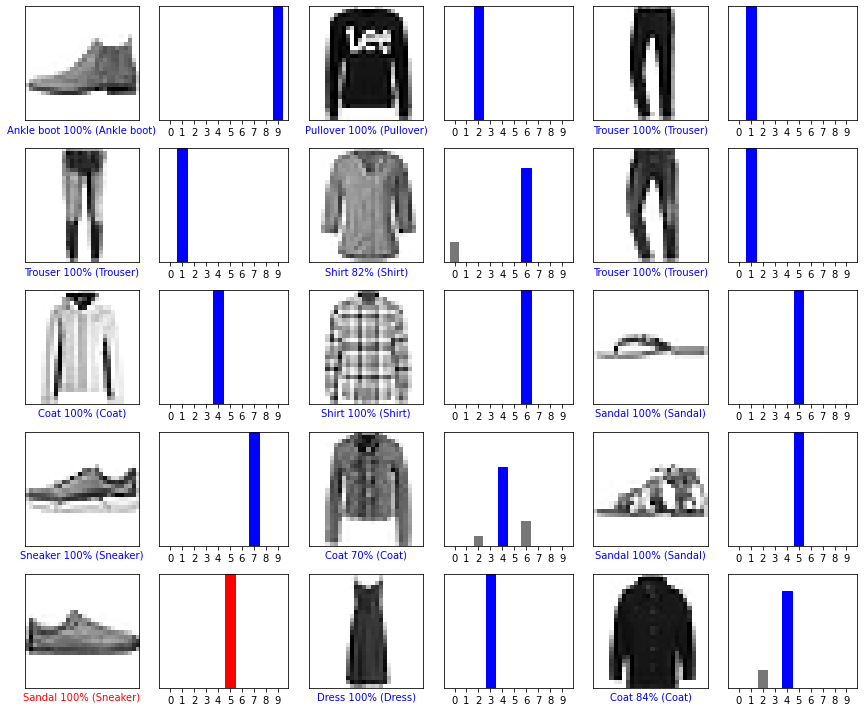

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Trained model

Using the trained model to make a prediction about a single image.

In [97]:
# Grab an image from the test dataset.

img = test_images[224]

print(img.shape)

(28, 28)


<b>tf.keras</b> models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a <b>list:</b>

In [98]:
# Add the image to a batch where it's the only member.

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


#### Predicting the correct label for this image:

In [99]:
#Still using the probability dunction

predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5201379e-17 4.0741123e-16 2.5403609e-15 2.5533238e-13 6.6416595e-15
  1.8623856e-06 4.5460735e-17 9.9999797e-01 2.3295010e-10 1.4099734e-07]]


_Create a prediction graph_

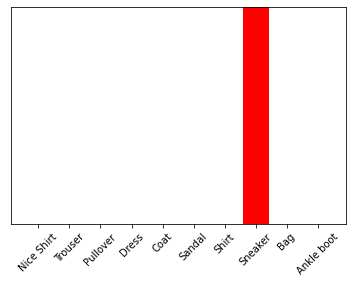

In [100]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [101]:
np.argmax(predictions_single[0])

7

# And the Keras Model predicts a label as expected!

#### NB:

There are multiple hidden layers like the <b>convolution layer, the ReLU layer, and pooling layer,</b> that perform feature extraction from the image. Finally, there’s a <b>fully connected layer</b> that _identifies_ the object in the image.

A convolutional neural network<b>(cnn)</b> is a <b>feed-forward neural network</b> that is generally used to analyze visual images by processing data with grid-like topology. 

It’s also known as a <b>ConvNet</b>. A convolutional neural network is used to _detect and classify objects in an image._, In CNN, every image is represented in the form of an array of pixel values.



#### Instance; 
a = [5,3,7,5,9,7]

b = [1,2,3]

In convolution operation, the arrays are multiplied element-wise, and the product is summed to create a new array, which represents a*b.

The first three elements of the matrix a are multiplied with the elements of matrix b. The product is summed to get the result. 

a = [5,3,7,#,#,#]

b = [1,2,3]

##### a*b = [17]



The <b>next three elements</b> from the matrix (a) are multiplied by the elements in matrix b, and the product is summed up;

a = [#,3,7,5,#,#]
b = [1,2,3]

##### a*b = [17,22]


This process continues until the convolution operation is _complete_.

CNN recognizes images by identifying relative functions. An instance;
        <b>The boxes that are colored represent a pixel value of 1, and 0 if not colored.</b>



### Layers in a Convolutional Neural Network

A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:

<b>Convolution layer:</b> is the first step in the process of extracting valuable features from an image, has several filters and Every image is considered as a <b>matrix of pixel values. (feature map)</b>

<b>ReLU layer(rectified linear unit)</b>: Once the feature maps are extracted, the next step is to move them to a ReLU layer. <b>ReLU performs</b> an _element-wise_ operation and sets all the negative pixels to 0. It introduces <b>non-linearity</b> to the network, and the generated output is a rectified feature map. _The original image is scanned with multiple <b>convolutions and ReLU layers</b> for locating the features._

<b>Pooling layer:</b> Pooling is a down-sampling operation that reduces the <b>dimensionality</b> of the feature map. The rectified feature map now goes through a pooling layer to generate a pooled feature map. The pooling layer uses various <b>filters</b> to identify different parts of the image like edges, corners, body, feathers, eyes, and beak.
     
The next step in the process is called flattening;
     <b>Flattening</b> is used to convert all the <b>resultant 2-Dimensional arrays</b> from _pooled feature maps_ into a _single long continuous linear vector_: 
     
The flattened matrix is fed as input to the <u>fully connected layer to classify the image.</u>



<b>Fully connected layer:</b>


### Here’s how exactly CNN recognizes a bird/object:

-The pixels from the image are fed to the <b>convolutional layer</b> that performs the convolution operation: 
    It results in a convolved map(_Feature Map_)

-The convolved map is applied to a <b>ReLU function</b> to generate a <b>rectified feature map</b> 

-The image is processed with <b>multiple convolutions and ReLU layers</b> for locating the features 

-<u>Different</u> <b>Pooling layers</b> with various <b>filters</b> are used to identify <u>specific parts</u> of the image 

-The Pooled feature map is <b>flattened</b> and fed to a <b>fully connected layer</b> to get the final <u>output</u>

# Detour ⤵︎

In [314]:
import numpy

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x = numpy.median(speed)

print(x)    # Get your median, mean, sum, product and averages

87.0


In [114]:
from scipy import stats

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

x = stats.mode(speed)

print(x)       # To get your mode

ModeResult(mode=array([86]), count=array([3]))


In [119]:
import numpy

speed = [86,87,88,86,87,85,86]

x = numpy.std(speed)    # std - standard deviation    //Difference btw each number and the average in the series

print(x)

0.9035079029052513


In [122]:
import numpy

speed = [32,111,138,28,59,77,97]

x = numpy.var(speed)      # For calculating variance which is the squareroot of std and cumulative average

print(x)

1432.2448979591834


<b>Standard Deviation</b> is often represented by the symbol Sigma: σ

<b>Variance</b> is often represented by the symbol Sigma Square: σ2

<b>σ</b>; 18th letter in greek alphabet and 18th star in a constellation

In [128]:
# What is the age that 90% of the people are younger than?

import numpy

ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

x = numpy.percentile(ages, 90)    

print(x) # Percentile in statistics to give you a number that describes the value that a given percent of the values

61.0


# How Can we Get Big Data Sets?
To create big data sets for testing, we use the Python module NumPy,

which comes with a number of methods to <b>create random data sets</b>, of any size.

In [267]:
# Create an array containing 250 random floats between 0 and 5:

import numpy

x = numpy.random.uniform(100, 103, 50)    # The deviation between the numbers are regulated by the first two int.

print(x)
print(len(x))
x.shape

[102.91688031 101.83635766 100.36807911 101.5884569  101.42570258
 101.83426771 102.22260695 101.99795249 100.30847767 102.82899669
 102.2540211  100.26180802 101.1822916  102.44827835 101.97446441
 101.49932179 102.00206879 101.12309612 102.80722844 102.68689519
 100.12034405 101.57347193 101.16391217 101.4525033  102.93844857
 100.92920224 101.70141598 100.35144848 101.93418994 100.56582193
 100.71354491 102.50199153 102.22828822 101.67085077 101.40319841
 102.17374741 100.12618038 101.48231283 102.12643051 100.03319811
 101.75115703 101.29589541 100.0297734  102.39680642 102.05393439
 101.93870092 100.0878913  102.96957286 101.19064112 101.26106427]
50


(50,)

### Histogram
To visualize the data set we can draw a histogram with the data we collected.

We will use the Python module <b>Matplotlib</b> to draw a histogram.

#### Example
Drawing a histogram:

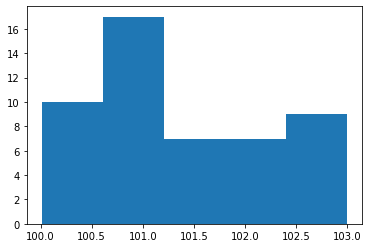

In [266]:
import numpy as np
import matplotlib.pyplot as plt    # plt as alias

x = np.random.uniform(100, 103, 50)

plt.hist(x, 5)     # for plotting a histogram, '5' for bars
plt.show()

# HISTOGRAM Breakdown

We use the array from the example above to draw a histogram with _5 bars._

The first bar represents how many values in the array are _between 100 and 100.5_

The second bar represents how many values are _between 100.5 and 101.0_

Which gives us this result:

10 values are between 0 and 1,
18 values are between 1 and 2,
7  values are between 2 and 3,
7  values are between 3 and 4,
9  values are between 4 and 5

#### Example 2
#### Big Data Distributions
Note: The array values are random numbers and will yield different results.

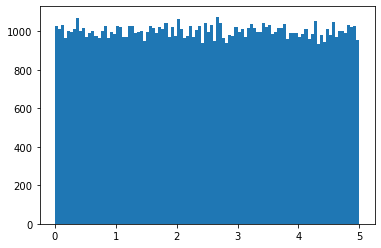

In [165]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.uniform(0.0, 5.0, 100000)    # Scaling

plt.hist(x, 100)
plt.show()

#### Normal Data Distribution

To create an array where the values are <b>concentrated</b> around a given value.

In probability theory this kind of data distribution is known as the _normal data distribution_, or the _Gaussian data distribution_. 

##### A typical normal data distribution (also known as the bell curve because of it's characteristic shape of a bell):


100000


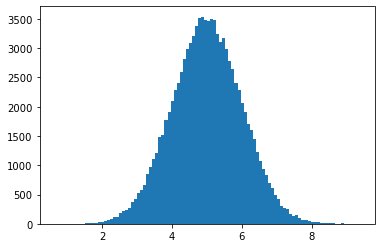

In [278]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)
print(len(x))
plt.hist(x, 100)
plt.show()
#print(x)

⤴︎ We use the array from the <b>numpy.random.normal()</b> method, with 100000 values,  to draw a histogram with 100 bars.

-We specify that the _mean value is 5.0_, and the _standard deviation is 1.0_.

-Meaning that the values should be concentrated around 5.0, and rarely further away than 1.0 from the mean.

-And as you can see from the histogram, most values are between 4.0 and 6.0, with a top at approximately 5.0.

## Scatter Plot
A scatter plot is a diagram where each value in the data set is represented <u>by a dot</u>,

The Matplotlib module has a method for drawing scatter plots, it needs two arrays of the <u>same length</u>, one for the values of the <b>x-axis</b>, and one for the values of the <b>y-axis:</b>

##### Using the scatter() method to draw a scatter plot diagram:

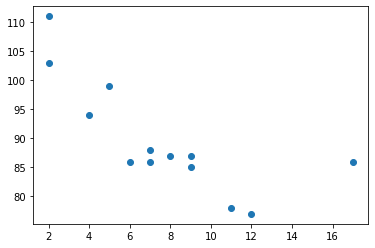

In [287]:
import numpy as np
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
 # The 'x array' represents the age of each car

y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
 # The 'y array' represents the speed of each car

plt.scatter(x, y)
plt.show()                          #NB: didn't have to specify scaling, standard deviation or mean value

##### Note: 

It seems that the newer the car, the faster it drives, but that could be a coincidence, after all we only registered 13 cars.

## Random Data Distributions

In Machine Learning the data sets can contain thousands-, or even millions, of values.

You might not have real world data when you are testing an algorithm, you might have to use randomly generated values.

Create two arrays that are both filled with 1000 random numbers from a normal data distribution.

The first array will have the mean set to 5.0 with a standard deviation of 1.0.

The second array will have the mean set to 10.0 with a standard deviation of 2.0:

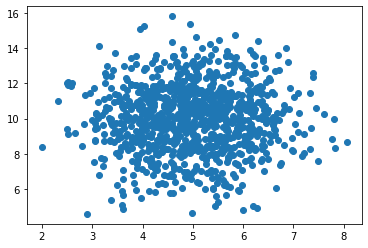

In [290]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)     #mean, standard deviation & total numbers

plt.scatter(x,y)
plt.show()

## Regression
The term regression is used when you try to find the <b>relationship between variables.</b>

In Machine Learning, and in statistical modeling, that relationship is used to <b>predict</b> the outcome of future events.

#### Linear Regression
Linear regression uses the relationship between the <b>data-points</b> to draw a <b>straight-line</b> through all of them.

This line can be used to <b>predict future values</b>, In Machine Learning, predicting the future is very important.



##### Start by drawing a scatter plot:

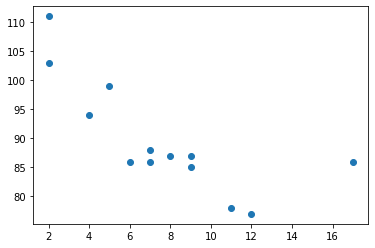

In [197]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

##### Import scipy and draw the line of Linear Regression:

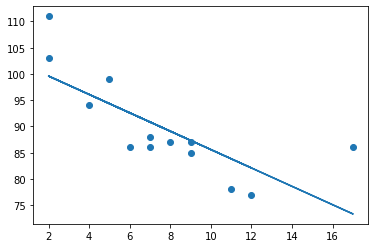

In [295]:
import matplotlib.pyplot as plt
from scipy import stats

# Create arrays that represent the values of the x and y axis:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# Executed a method that returns important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Create a function that uses the slope and intercept values to return a new value. 

# This new value represents where on the y-axis the corresponding x value will be placed:
def myfunc(x):
  return slope * x + intercept

# Run each value of the x array through the function. This will result in a new array with new values for the y-axis:
mymodel = list(map(myfunc, x))     # Corresponding points are stored in "mymodel" variable

# Draw the original scatter plot:
plt.scatter(x, y)

#Draw the line of linear regression:
plt.plot(x, mymodel)

# Display the diagram:
plt.show()

## R for Relationship
It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - <b>the coefficient of correlation</b> - is called <b>r</b>.

The r value ranges from -1 to 1, where <b>0 means no relationship, and 1 (and-or -1) means 100% related.</b>

Python and the Scipy module will compute this value for you, all you have to do is feed it with the x and y values.

##### Example
How well does my data fit in a linear regression?

In [342]:
from scipy import stats    #Linregress

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.7585915243761551


##### Note: 
        The result -0.76 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

### Predict Future Values with Linear Regression
Now we can use the information we have gathered to predict future values.

<b>Example:</b> Let us try to predict the speed of a 10 years old car.

To do so, we need the same <b>myfunc()</b><u>(stored variable func)</u> function from the example above:

In [352]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(22)

print(speed)             # speed prediction


64.5776306107432


## Polynomial Regression
If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.

Polynomial regression, like linear regression, uses the relationship between the variables <u>x and y to find the best way to draw a line through the data points.</u>

#### How Does it Work?
Python has methods for finding a relationship between data-points and to draw a line of polynomial regression.

In the example below, we have registered 18 cars as they were passing a certain tollbooth.

We have registered the car's speed, and the time of day (hour) the passing occurred.

The x-axis represents the hours of the day and the y-axis represents the speed:

##### Example
Start by drawing a scatter plot:



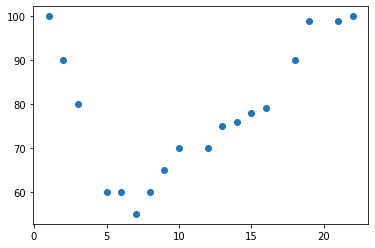

In [219]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)      # standard plotting procedure
plt.show()

Import numpy and matplotlib then draw the line of <b>Polynomial Regression:</b>

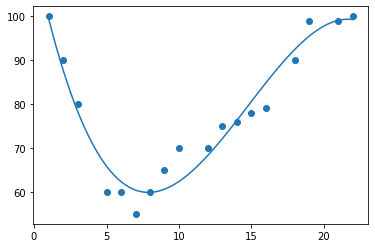

18


In [334]:
# Create the arrays that represent the values of the x and y axis:

import numpy    # Needed for; "polynomial model"
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# NumPy has a method that lets us make a polynomial model:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# Then specify how the line will display, we start at position 1, and end at position 22:
myline = numpy.linspace(1, 22, 100)

# Draw the original scatter plot:
plt.scatter(x, y)

# Draw the line of polynomial regression:
plt.plot(myline, mymodel(myline))

# Display the diagram:
plt.show()
print(len(x))

## R-Squared
It is important to know how well the relationship between the values of the <b>x- and y-axis</b> is, if there are no relationship the <b>polynomial regression</b> can not be used to predict anything.

The relationship is measured with a value called the <b>r-squared.</b>

The r-squared value ranges <u>from 0 to 1, where 0 means no relationship, and 1 means 100% related.</u>

#### Example
How well does my data fit in a <b>polynomial regression</b>?



In [225]:
import numpy                                # R-squared mainly used in indentifying relationship btw x and y
from sklearn.metrics import r2_score      # Importing r-squared

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


The above result shows good relationship and polynomial expressions can be used in the future

## Predicting Future Values using Polynomial
We can use the information gathered to predict future values.

#### Example: Let us try to predict the speed of a car that passes the tollbooth at around 17 P.M:

To do so, we need the same <b>mymodel array (mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)))</b>

##### Predicting the speed of a car passing at 17 P.M:

88.87331269698007


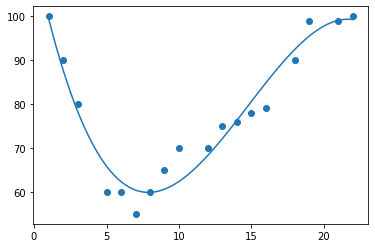

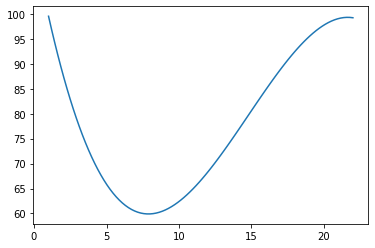

In [353]:
import numpy
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

speed = mymodel(17)
print(speed)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()                 # Time(x-axis) against speed(y-axis)
plt.plot(myline, mymodel(myline))

It predicted 88.87km at 17pm(5 o' clock)

##### BAD Example

In [6]:
pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

print(r2_score(y, mymodel(x)))      # very low R-squared resulting in a bad relationship for a polynomial regression
speed = mymodel(17)
print(speed)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

ModuleNotFoundError: No module named 'numpy'